# Метод наискорейшего спуска

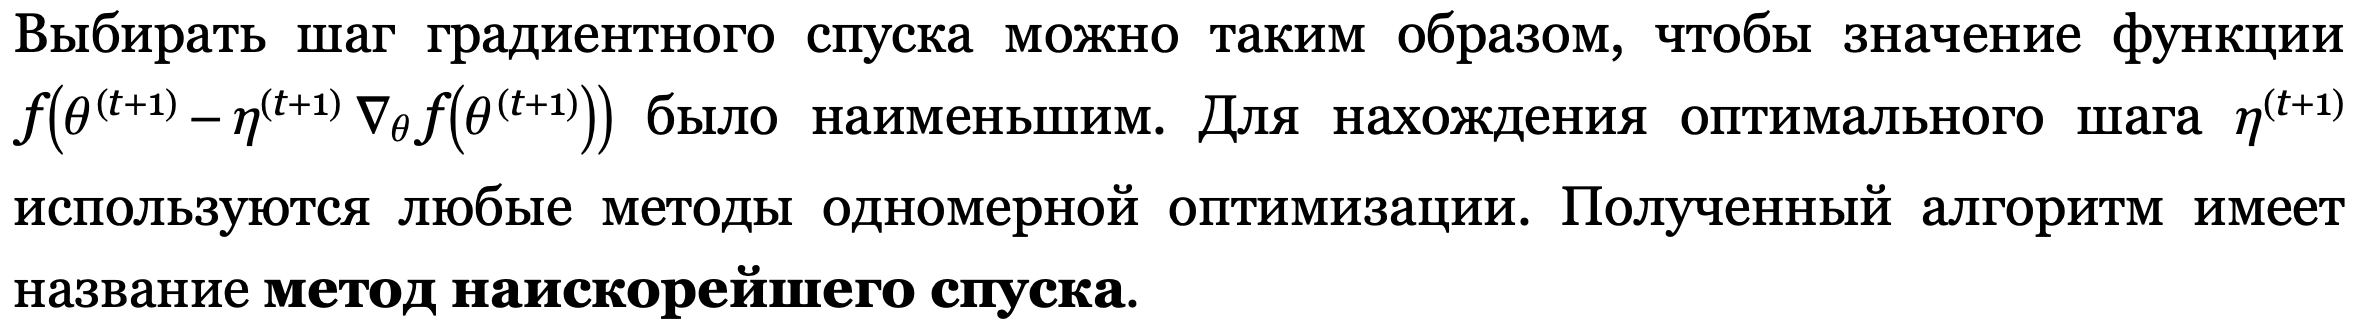

In [1]:
# метод одномерной оптимизации для нахождения оптимального параметра m

def dich_search(f, a, b, e, ex_type): #ex_type = {1 (to find max), -1 (to find min)}
    while abs(b - a) >  e:
        x = (a + b)/2
        x1 = (x - e)
        x2 = (x + e)
        if ex_type * f(x2) < ex_type * f(x1):
            b = x
        else:
            a = x
    return x 


def f(x, y):
    return x**4 + y**2 + 2*x*y
    
    
def dx(f, x, y):
    return 4 * (x**3) + 2*y


def dy(f, x, y):
    return 2*y + 2*x


def grad(f, x0, y0):
    d_x = dx(f, x0, y0)
    d_y = dy(f, x0, y0)
    return d_x, d_y

In [2]:
def steepest_descent(f, x0, y0, e):
    
    g = grad(f, x0, y0)
    fun = lambda m: f(x0 - m * g[0], y0 - m * g[1]) # функция, зависящая от параметра m, которую нужно оптимизировать
    eta = dich_search(fun, 0, 1, e, -1) # находим минимальный параметр eta
    x1 = x0 - eta * g[0]
    y1 = y0 - eta * g[1]
    
    while abs(f(x1, y1) - f(x0, y0)) > e:
        x0, y0 = x1, y1
        eta = dich_search(fun, 0, 1, e, -1) # находим минимальный параметр eta 
        g = grad(f, x0, y0)
        x1 -= eta * g[0] # двигаемся в сторону антиградиента
        y1 -= eta * g[1] # двигаемся в сторону антиградиента
        
    return (x1, y1)

In [3]:
steepest_descent(f, 0, 1, 0.000000000001)

(-0.7042849608202798, 0.7078496549912171)